In [2]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                                                                      #libreria para generación de graficos en 2D
import mglearn as mg
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split                                                                 #libreria para dividir conjunto de datos en train y test.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score                                                    #libreria para usar matriz de confusión, calcular la presición, recall y exactitud.
from sklearn.linear_model import Lasso
import seaborn as sns
from scipy import stats
from matplotlib.patheffects import withStroke
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

##LEEMOS EL DATASET YA PREPROCESADO(sin registros nulos) QUE CONTIENE LOS DATOS DE LA PLANTA IMPREGNADORA DE PAPEL.

In [13]:
proyecto=pd.read_csv('https://raw.githubusercontent.com/aristidesuao/proyectoAP/main/proyecto_pre-procesado.csv') #archivo csv que los datos del proceso gap de la impregnadora de papel.

df=pd.DataFrame(proyecto) #se crea dataframe


##ANALISIS DE LAS VARIABLES NUMERICAS
A continuación, procedemos analizando las variables numéricas que componen el dataset, con el método describe:

In [14]:
df.describe()

,Gramaje,GAP LO(mm),GAP LT(mm),Temp Horno 1,Temp Horno 2,Temp Horno 3,Temp Horno 4,Temp Horno 5,Temp Horno 6,Vel Vent Horno 1,...,PESO IMPREGNADO LO1,PESO IMPREGNADO LC,PESO IMPREGNADO LT1,VOLATILES LO2,VOLATILES LC2,VOLATILES LT2,FLUIDEZ,ESTADO B LO3,ESTADO B LC3,ESTADO B LT3
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,72.337209,0.117547,1.977657,137.145349,137.145349,137.145349,207.854651,213.587209,138.412791,1154.360465,...,180.187209,177.687791,180.368023,6.588953,5.580814,6.369186,3.959884,26.559302,48.929070,30.738198
std,9.905531,0.018497,17.189983,6.922024,6.922024,6.922024,13.418449,11.582830,2.615397,154.734817,...,20.710275,20.188692,20.045360,0.536226,0.509367,0.611903,1.211768,9.090196,12.396022,9.388525
min,60.000000,0.090000,0.087000,120.000000,120.000000,120.000000,185.000000,191.000000,135.000000,700.000000,...,148.900000,148.900000,147.600000,5.500000,4.400000,5.000000,1.100000,11.600000,22.200000,14.500000
25%,65.000000,0.105000,0.107000,134.000000,134.000000,134.000000,190.000000,198.000000,137.000000,1100.000000,...,166.300000,164.300000,166.775000,6.300000,5.200000,5.875000,3.175000,20.200000,40.375000,24.475000
50%,68.000000,0.113000,0.114000,137.000000,137.000000,137.000000,216.000000,220.000000,138.000000,1200.000000,...,171.650000,168.800000,173.000000,6.600000,5.500000,6.400000,4.300000,25.000000,47.900000,28.725000
75%,75.000000,0.125000,0.123000,142.000000,142.000000,142.000000,217.000000,222.000000,139.000000,1250.000000,...,181.550000,179.075000,182.750000,6.900000,5.925000,6.800000,4.925000,29.650000,56.100000,35.550000
max,90.000000,0.165000,160.000000,151.000000,151.000000,151.000000,220.000000,226.000000,150.000000,1300.000000,...,224.500000,222.200000,225.800000,8.600000,6.700000,8.000000,8.000000,66.600000,80.700000,66.400000


1. Gramaje: la media es muy similar a la mediana por ende puede que sean datos simetricos. También tiene un desviación estandar relativamente baja, lo que quiere decir que los datos están cerca de la media.

2. GAP LO(mm): la media es muy similar a la mediana por ende puede que sean datos simetricos. También tiene un desviación estandar relativamente baja, lo que quiere decir que los datos están cerca de la media.

3. GAP LT(mm): El valor máximo es muy elevado con respecto a la media o media. Además de tener un valor de desviación estandar muy elevado. Esta variable debe ser analizada más a fondo. Es posible que ese valor máximo de 160 halla hizo mal digitado por los operarios del proceso.

4. Temp Horno 1,2,3,4,5 y 6: tienen un comportamiento similar. La media es muy similar a la mediana por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los datos están carca de la media.

5. Vel Horno 1,2,3,4,5 y 6: tienen un comportamiento similar. La media es muy similar a la mediana por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los datos están cerca de la media.

6. Vel linea: la velocidad de la linea tiene una media muy similiar a la mediana, por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los están cerca de la media.

7. PESO IMPREGNADO LO1, LC, LT1: tiene una media muy similiar a la mediana, por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los están cerca de la media.

8. VOLATILES LO2, LC, LT2:tiene una media muy similiar a la mediana, por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los están cerca de la media.

9. ESTADO B LO3,LC3, LT3: tienen un valor máximo alejado de la media, esto puede ser indicio de valores atipicos.

##VARIABLES CATEGORICAS

In [15]:
categorical_features=df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['DISENO', 'PLANTA'], dtype='object')


In [16]:
for variable in categorical_features[:]:
    # Histogram
    countplot_fig = px.histogram(df, x=df[variable].value_counts().index, y=df[variable].value_counts().values,title=f'Conteo para {variable}')
    countplot_fig.update_traces(texttemplate='%{y}', textposition='outside')
    countplot_fig.update_xaxes(categoryorder='total ascending')
    # Pie chart
    counts = df[variable].value_counts()
    labels = counts.index
    pie_chart_fig = px.pie(names=labels, values=counts, title=f'Gráfico de Torta para {variable}',
                        labels={'names': '', 'values': ''},
                        hole=0.3)

    # Mostrar leyenda al pie chart usando las etiquetas del índice
    pie_chart_fig.update_traces(textinfo='percent+label', pull=[0.05]*len(labels))

    # Guardar y mostrar la figura

    countplot_fig.write_html(f"{variable}_countplot.html")
    pie_chart_fig.write_html(f"{variable}_pie_chart.html")
    countplot_fig.show()
    pie_chart_fig.show()

Se observa que el papel que más se fabrica en la planta de impregnación es el papel nevado, seguido de austral y arena.

Y las plantas que más papel recibe es la planta de laminación BP2 y BP1.

##Correlaciones entre variables numericas - Pearson, Spearman, Kendall

In [17]:
def stars(p):
    """
    Returns a string of asterisks (*) based on the significance level (alpha value) of a statistical test.

    Args:
        p (float): the p-value of the statistical test

    Returns:
        A string of asterisks indicating the significance level, as follows:
        - five asterisks (*****): alpha value is 0.0001 or 0.01% with 99.99% confidence
        - four asterisks (****): alpha value is 0.001 or 0.1% with 99.9% confidence
        - three asterisks (***): alpha value is 0.01 or 1% with 99% confidence
        - two asterisks (**): alpha value is 0.05 or 5% with 95% confidence
        - one asterisk (*): alpha value is 0.1 or 10% with 90% confidence
        - empty string (''): alpha value is greater than or equal to 0.1
    """
    if p < 0.0001:
        return '*****'
    elif p < 0.001:
        return '****'
    elif p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

In [18]:
def plot_correlations(dataframe, corr_methods):
    for method in corr_methods:
        stroke = withStroke(linewidth=2, foreground='black')
        corr_matrix = dataframe.corr(method=method)
        pval_matrix = dataframe.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

        # Create a mask to show only the lower triangle of the matrix
        mask = np.triu(np.ones_like(corr_matrix))
        mask2 = np.tril(np.ones_like(corr_matrix))
        stars_corr = pval_matrix * mask2 + mask
        pval_stars = stars_corr.applymap(stars)
        color_palette = sns.color_palette("Blues")
        with sns.axes_style("whitegrid"):
            f, ax = plt.subplots(figsize=(50, 50))
            ax = sns.heatmap(corr_matrix.round(4),
                            mask=mask,
                            vmax=1,
                            center=0,
                            vmin=-1,
                            square=True,
                            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True),
                            linewidths=.5,
                            annot=True,
                            annot_kws={"size": 12},
                            fmt='.2f')
            ax.set_title(f'{method.capitalize()} Correlations Matrix', fontsize=20)
            plt.xticks(fontsize=9)
            plt.yticks(fontsize=9)

            for i, j in itertools.product(range(corr_matrix.shape[0]), range(corr_matrix.shape[0])):
                ax.text(j + 0.5, i + 0.8, pval_stars.iloc[i, j], ha='center', va='center', color='white', fontsize=18,path_effects=[stroke])

            plt.savefig((f'correlation_vi_{method.capitalize()}_triangular_stage.png'), dpi=300, bbox_inches='tight')
            plt.show()

In [19]:
numerical_features=df.select_dtypes(include=['number']).columns
print(numerical_features)

Index(['Gramaje', 'GAP LO(mm)', 'GAP LT(mm)', 'Temp Horno 1', 'Temp Horno 2',
       'Temp Horno 3', 'Temp Horno 4', 'Temp Horno 5', 'Temp Horno 6',
       'Vel Vent Horno 1', 'Vel Vent Horno 2', 'Vel Vent Horno 3',
       'Vel Vent Horno 4', 'Vel Vent Horno 5', 'Vel Vent Horno 6', 'Vel Linea',
       'PESO IMPREGNADO LO1', 'PESO IMPREGNADO LC', 'PESO IMPREGNADO LT1',
       'VOLATILES LO2', 'VOLATILES LC2', 'VOLATILES LT2', 'FLUIDEZ',
       'ESTADO B LO3', 'ESTADO B LC3', 'ESTADO B LT3'],
      dtype='object')


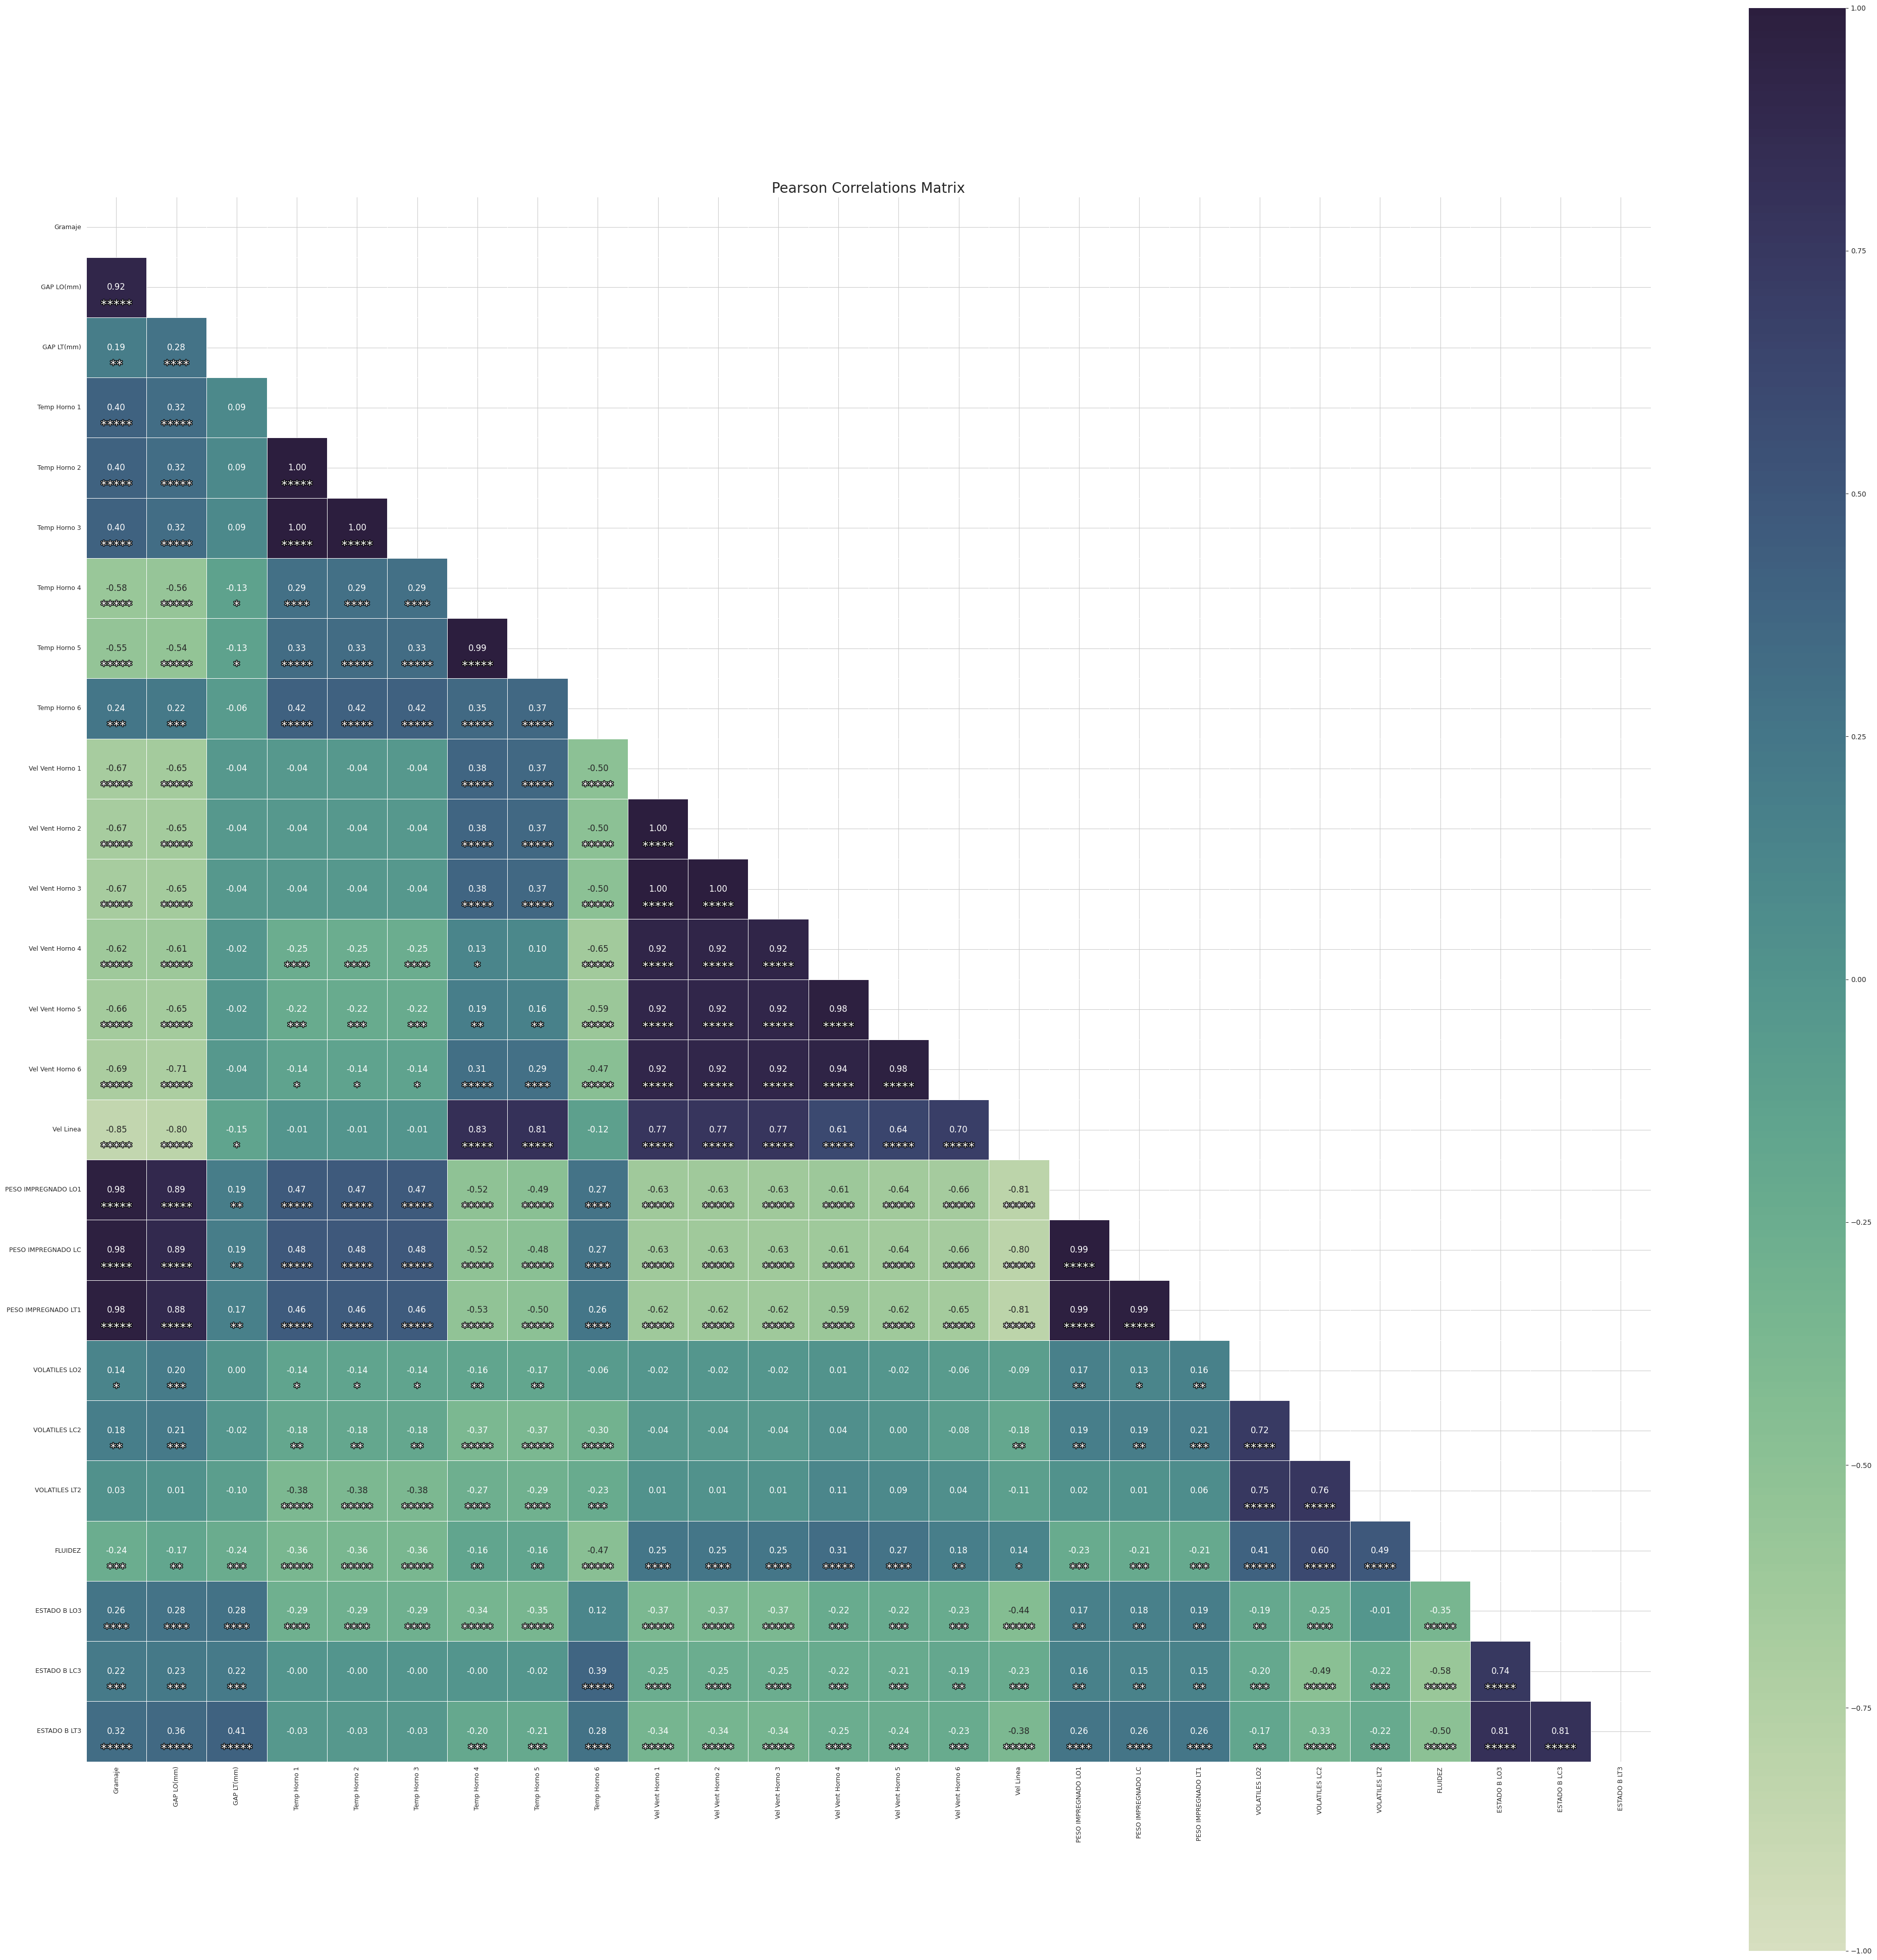

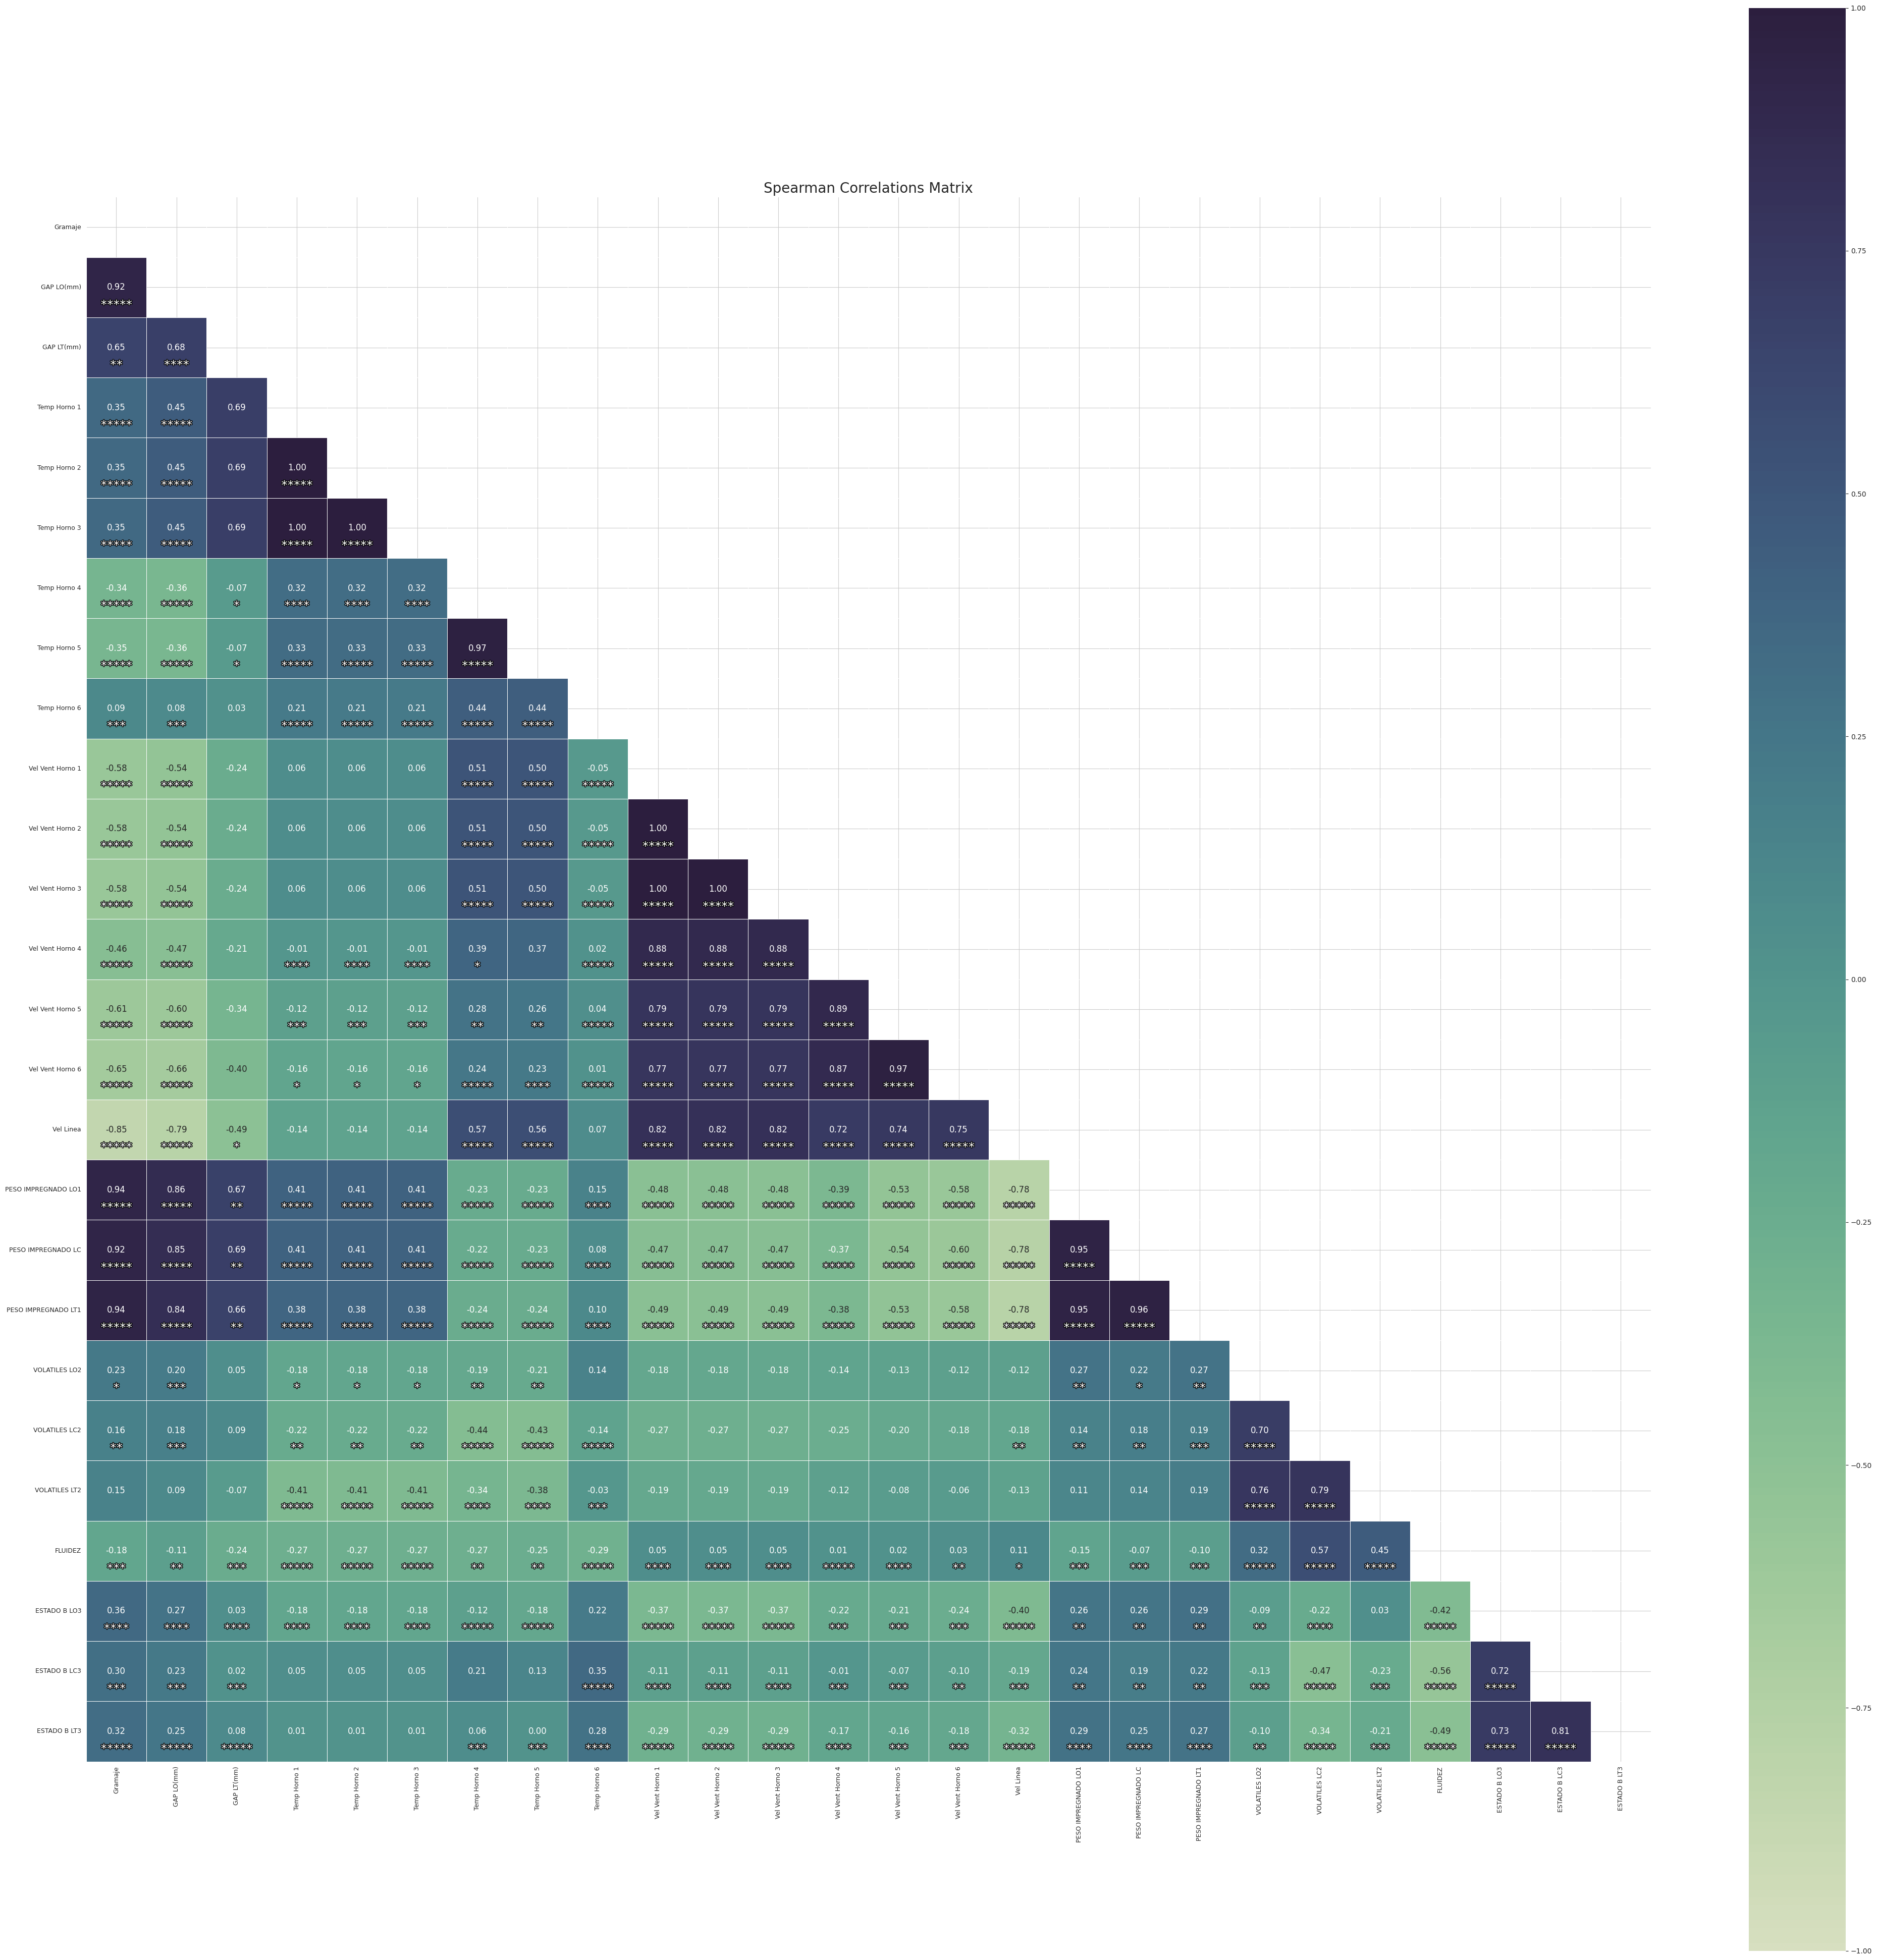

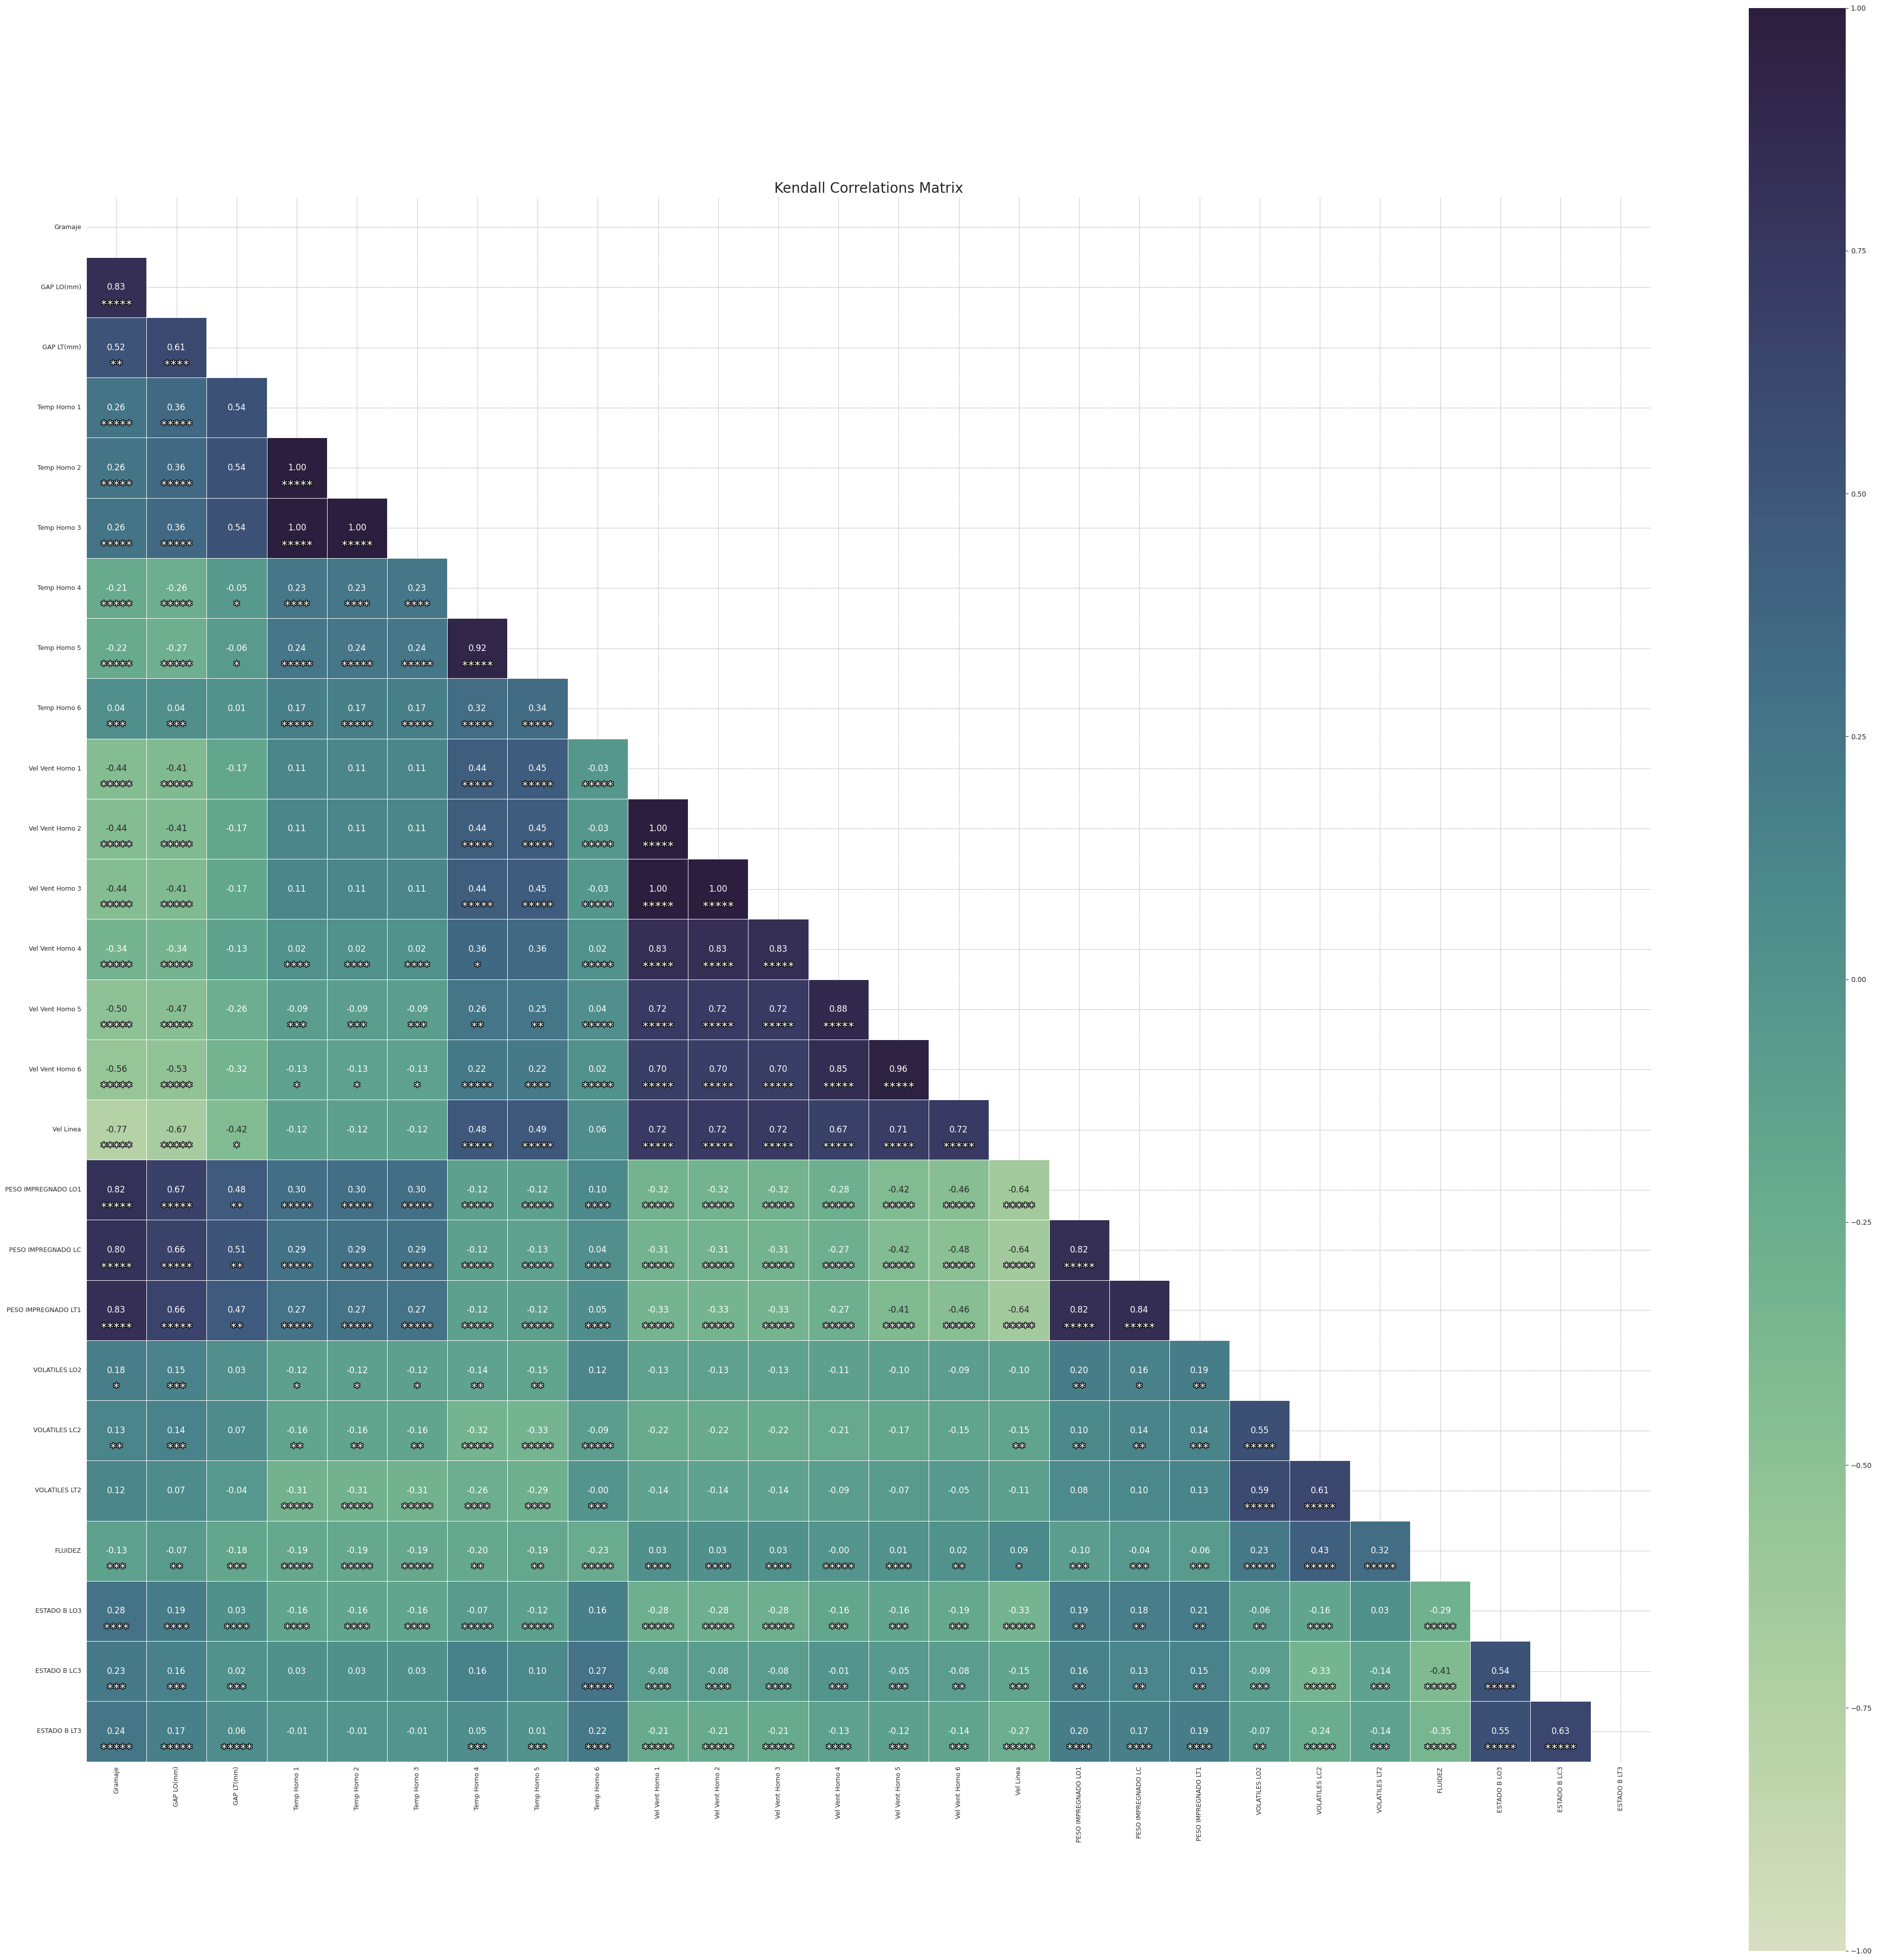

In [20]:
correlation_methods = ['pearson','spearman','kendall']
plot_correlations(df[numerical_features],correlation_methods)

1. Gramaje tiene un fuerte correlación positiva con el GAP LO(mm) debido a que de este lado de operación los rodillos tienen desgaste. Gramaje también tiene una fuerte correlación con el peso impregnado.

2. La temperatura del horno 1 tiene una fuerte correlación positiva con la temperatura del del horno 2 y 3.

3. la temperatua del horno 2 tiene una fuerte correlación positiva con la temperatura del horno3.

4. La temperatura del horno 4, tiene una fuerte correlación positiva con la temperatura del horno 5.

5. La velocidad del ventilador del horno 1 tiene una fuerte correlación positiva con la velocidad del ventilador del horno 2,3 y 4.

6. La velocidad del ventilador del horno 2 tiene una fuerte correlación positiva con la velocidad del ventilador del horno 3 y 4.

7. La velocidad del ventilador del horno 4 tiene una fuerte correlación positiva con la velocidad del ventilador del horno 5.

8. la velocidad del ventilador del horno 5 tiene una fuerte correlación positiva con la velocidad del ventilador del horno 6.

9. El peso impregnado LO1 tiene una fuerte correlación positiva con el peso impregnado LC y LT1.

10. el peso impregnado LC tiene una fuerte correlación positiva con el peso impregnado LT1.

11. la velocidad de la linea tiene una fuerte correlación negativa con el peso impregnado LC, LO1, LC1 y el gramaje del papel.  

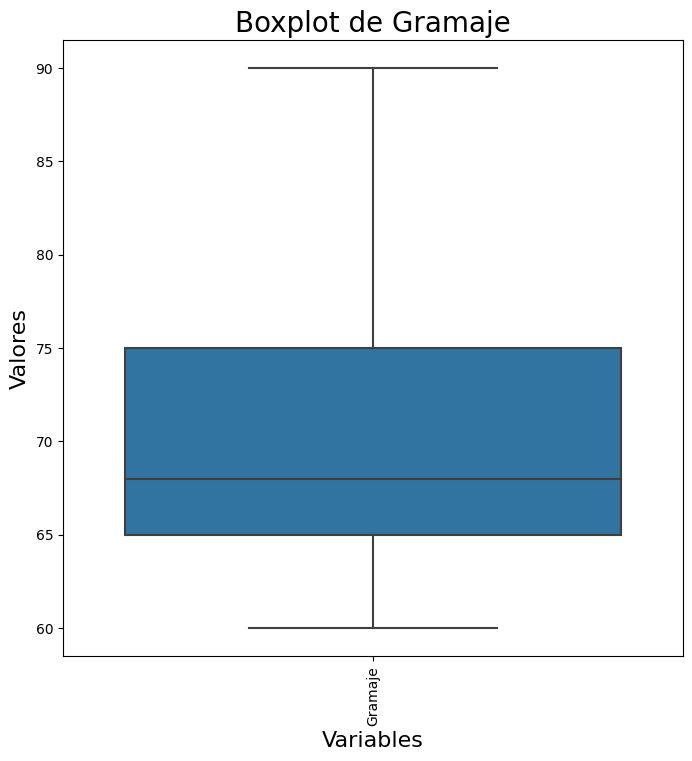

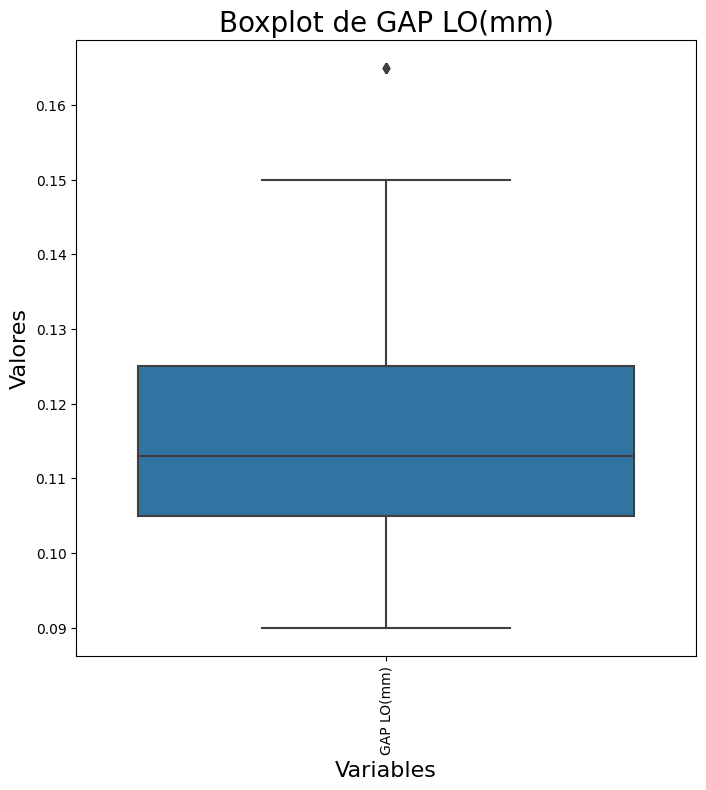

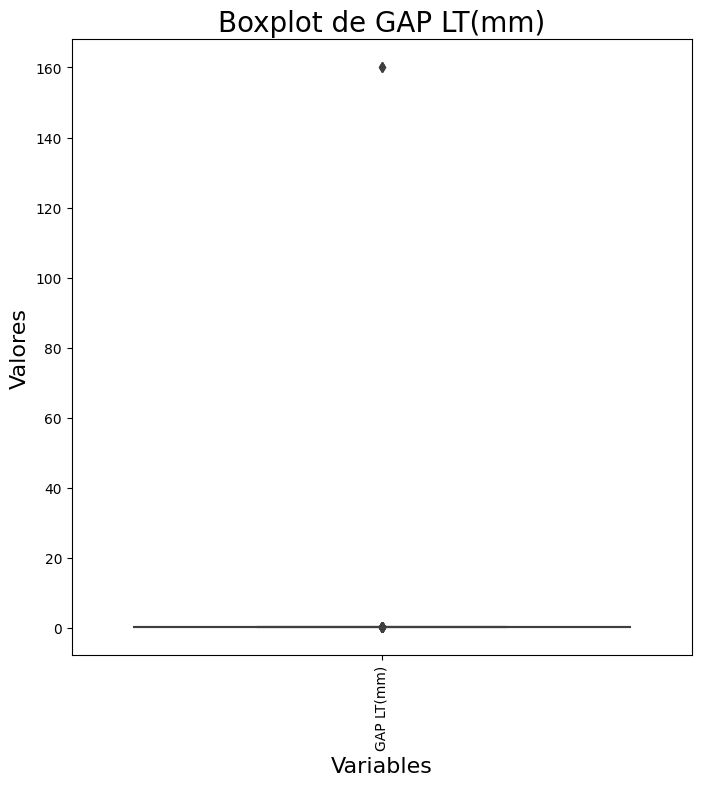

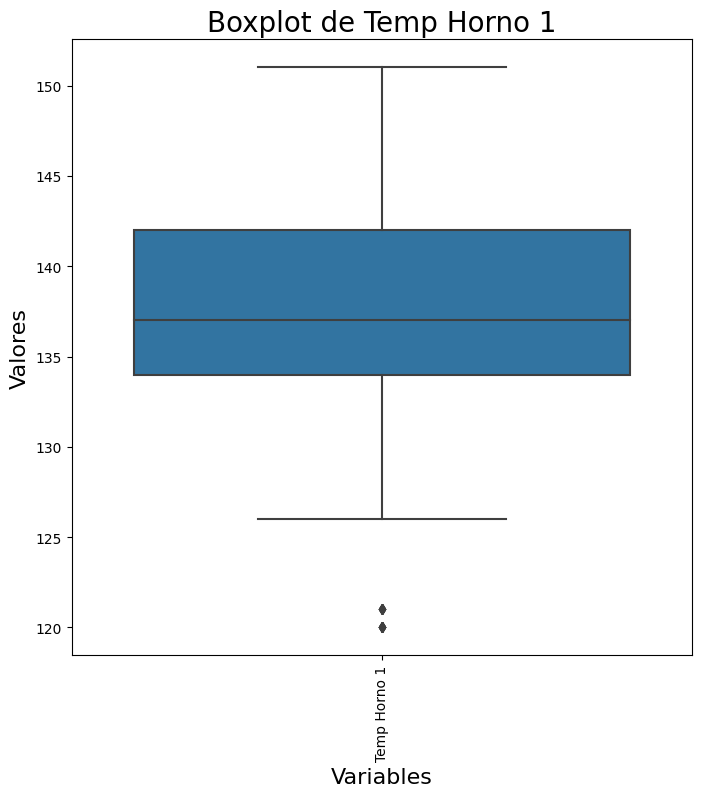

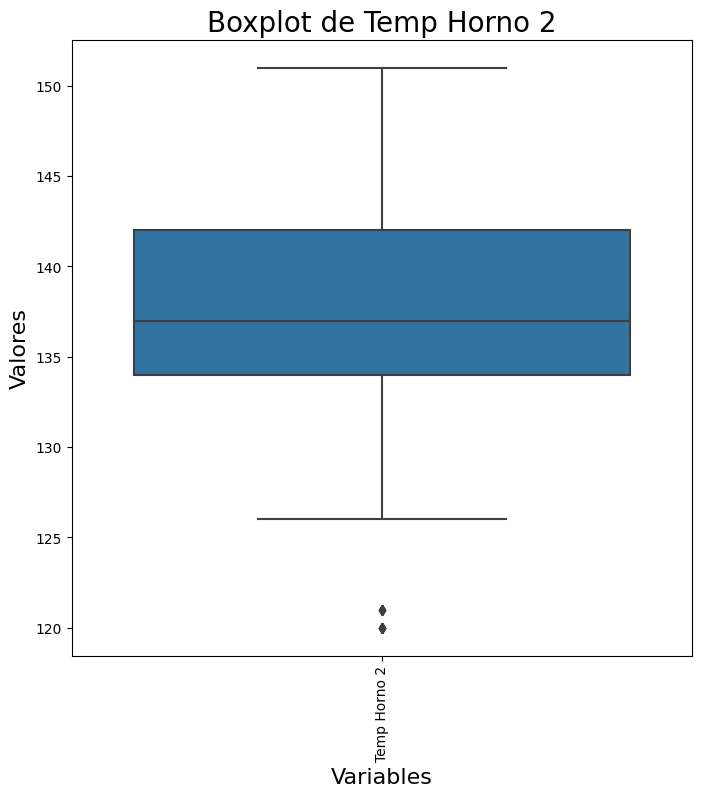

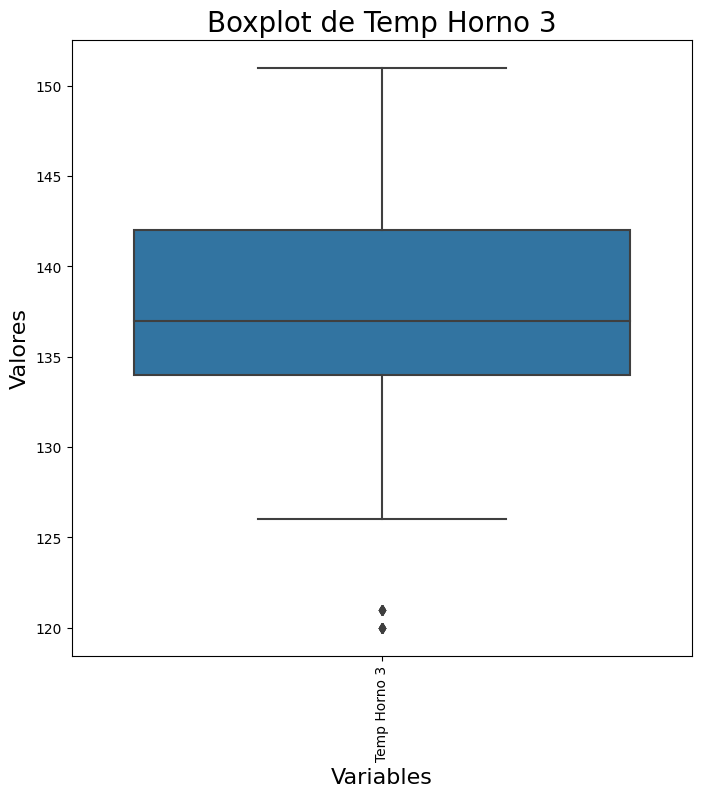

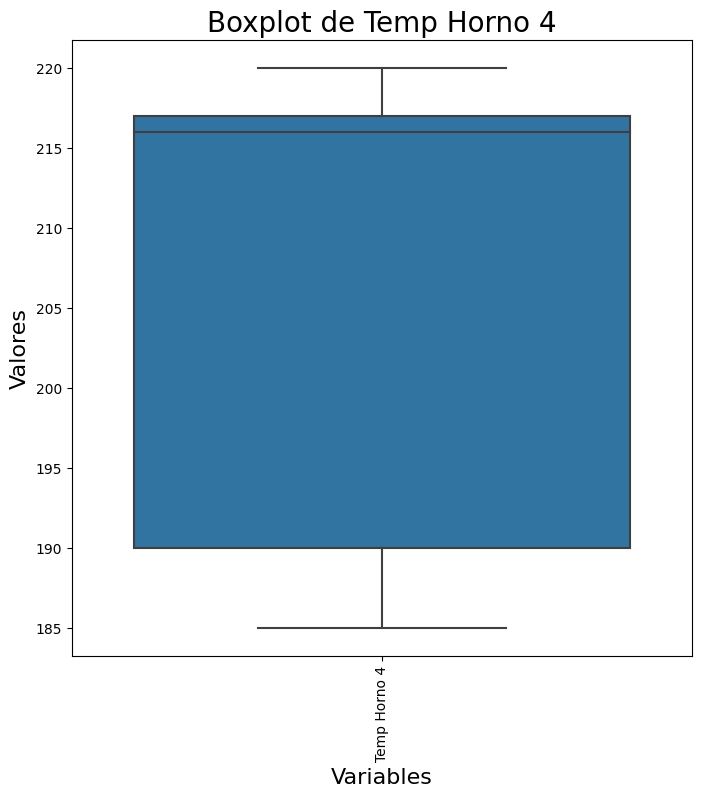

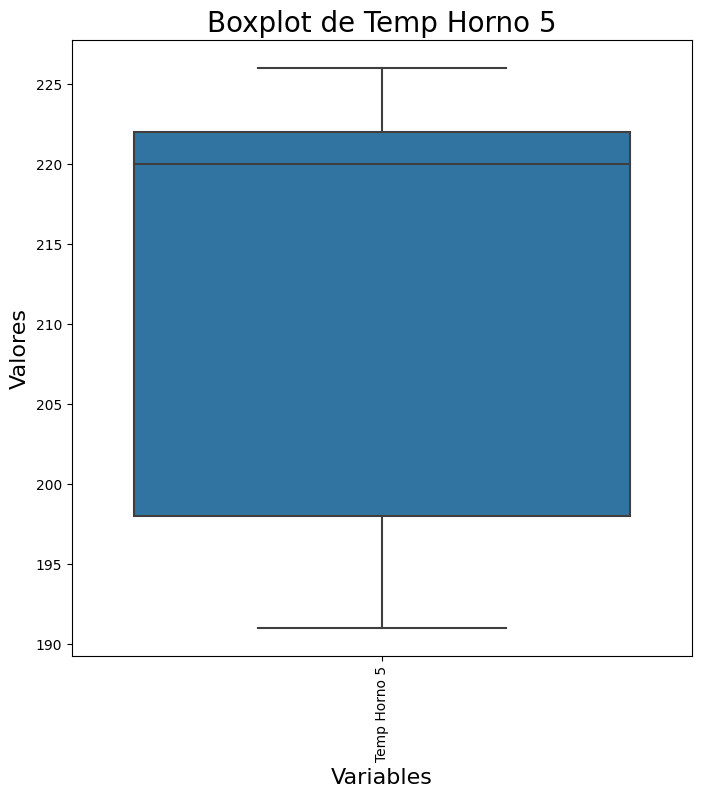

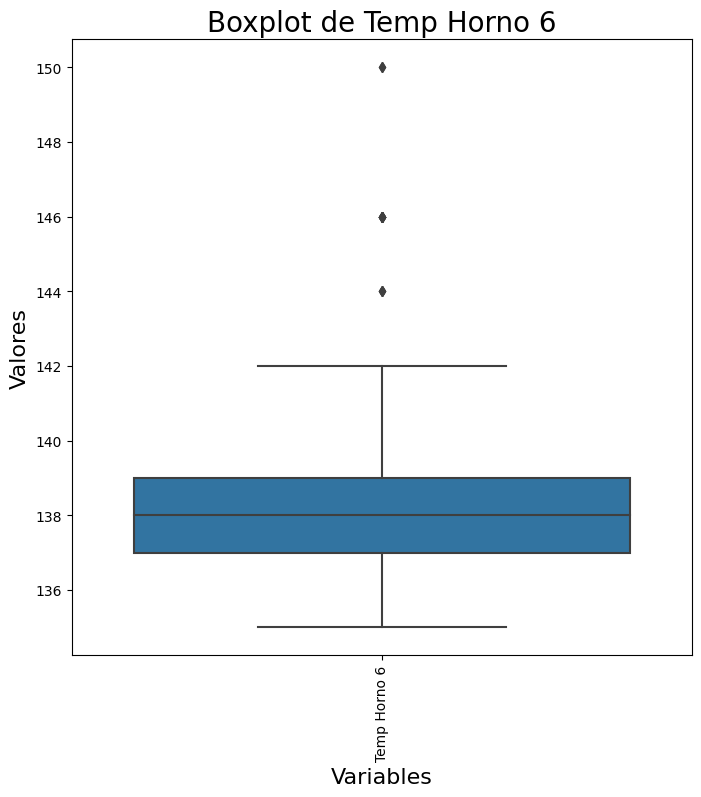

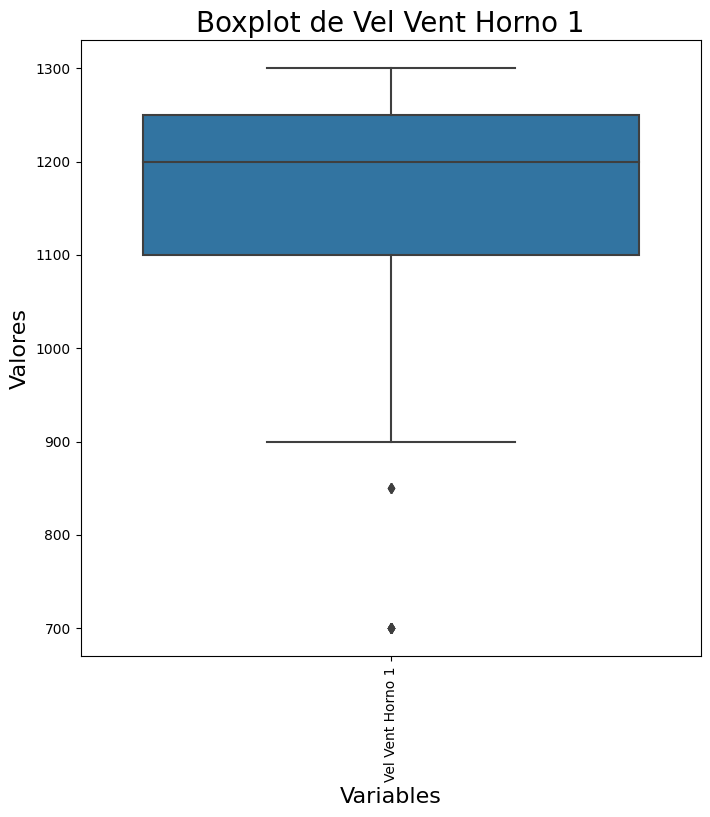

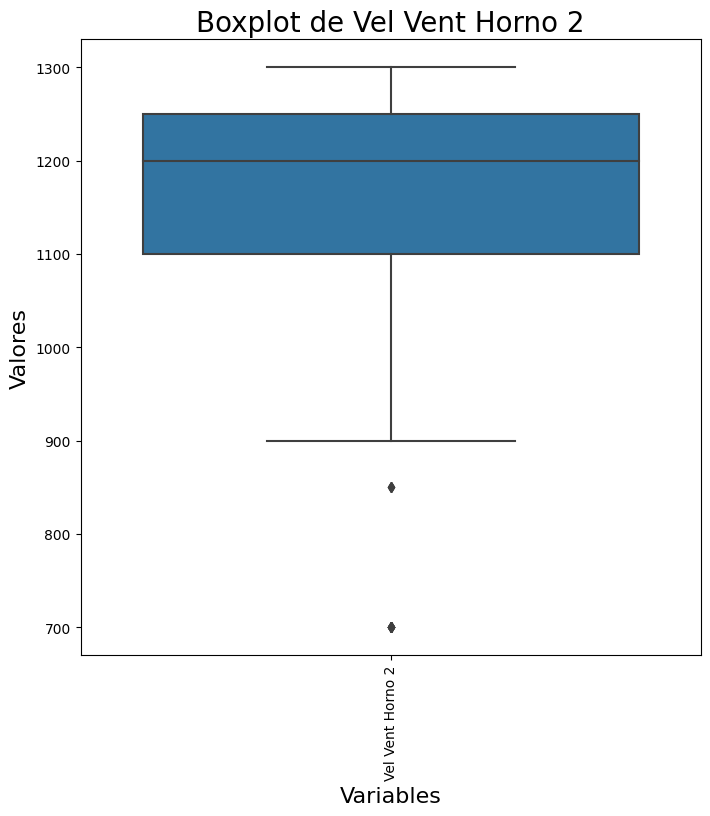

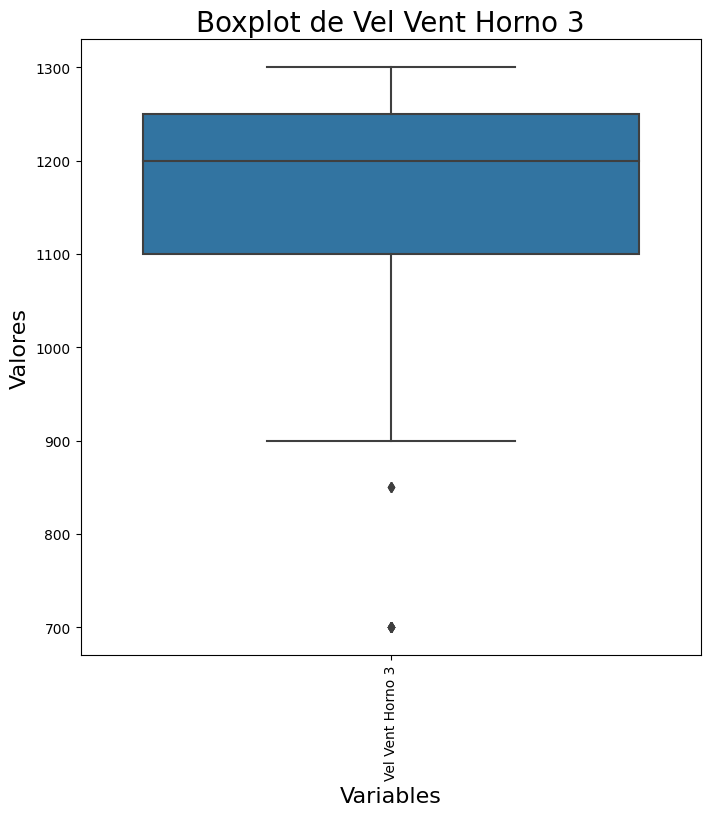

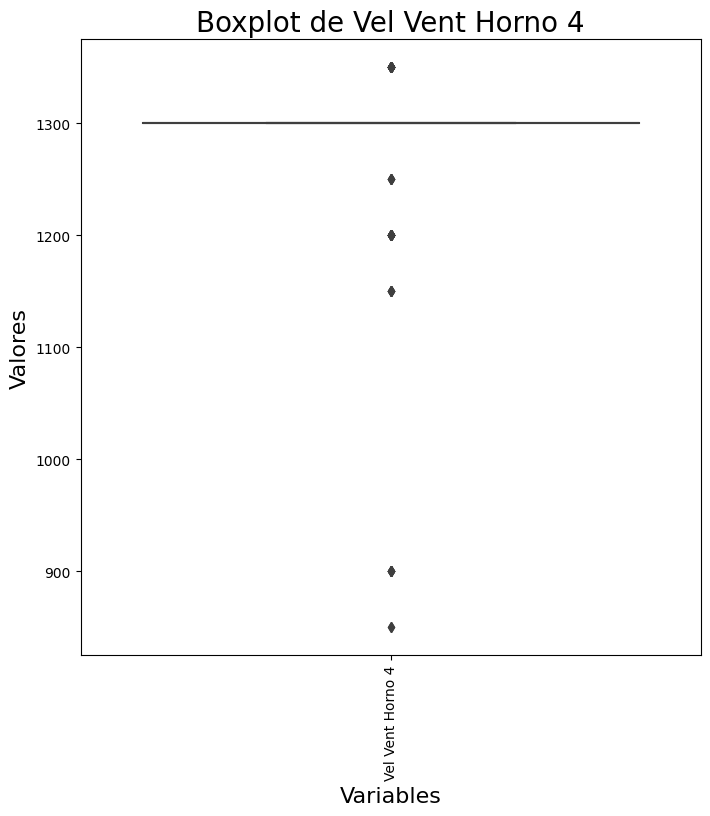

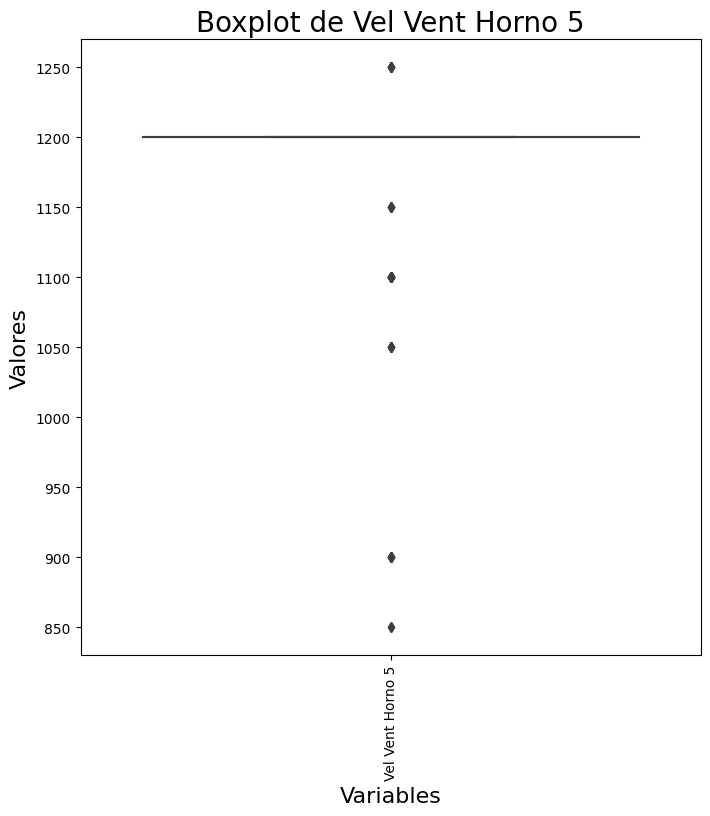

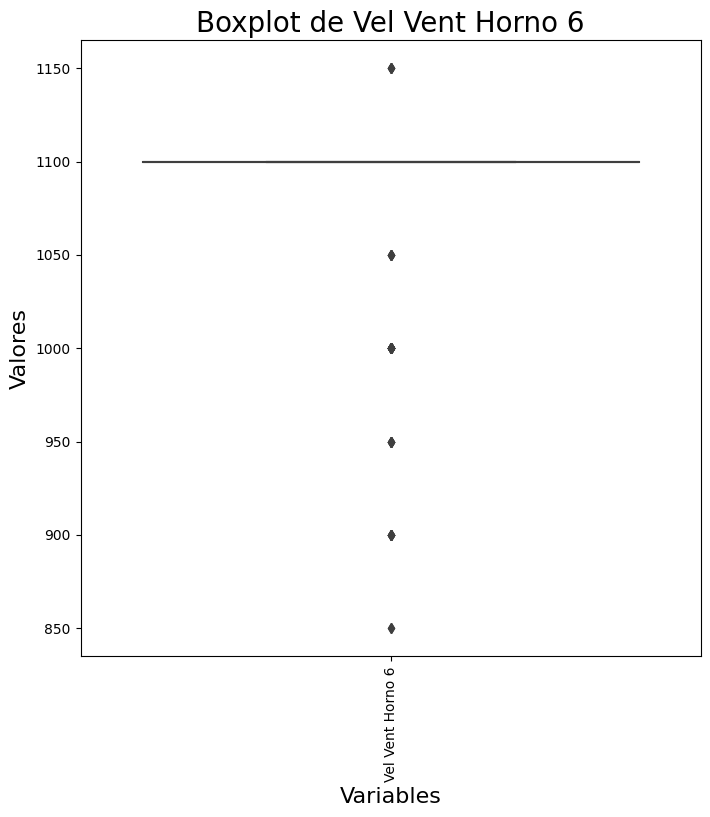

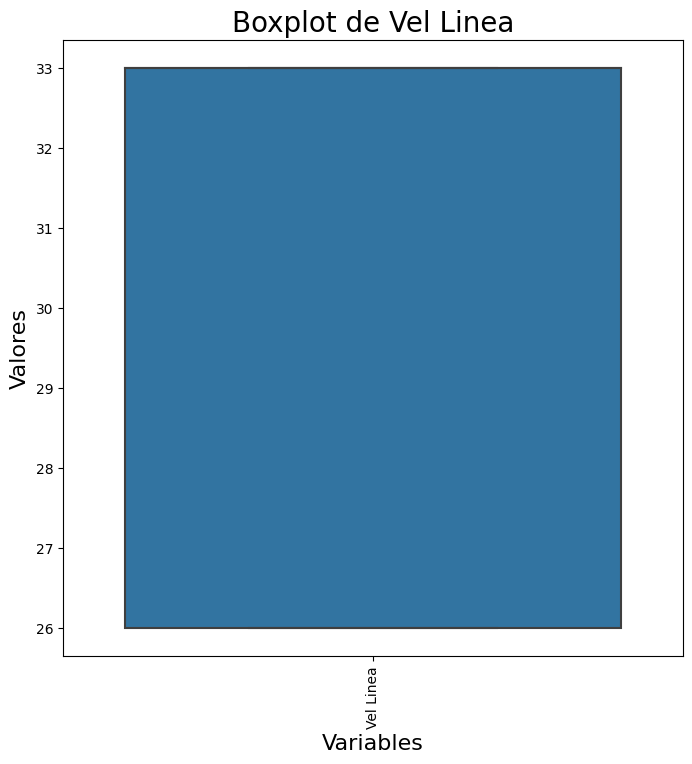

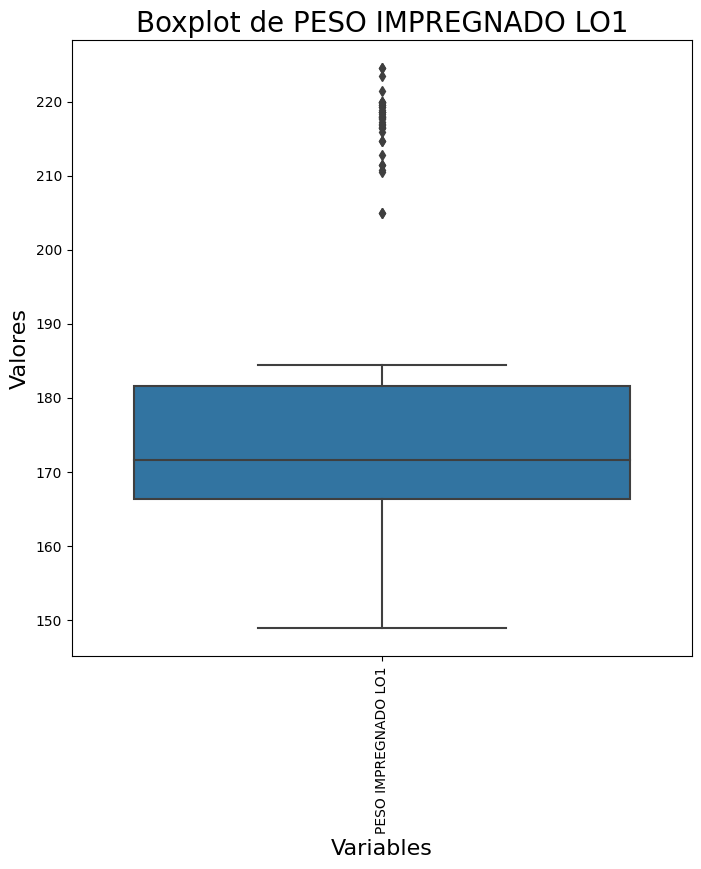

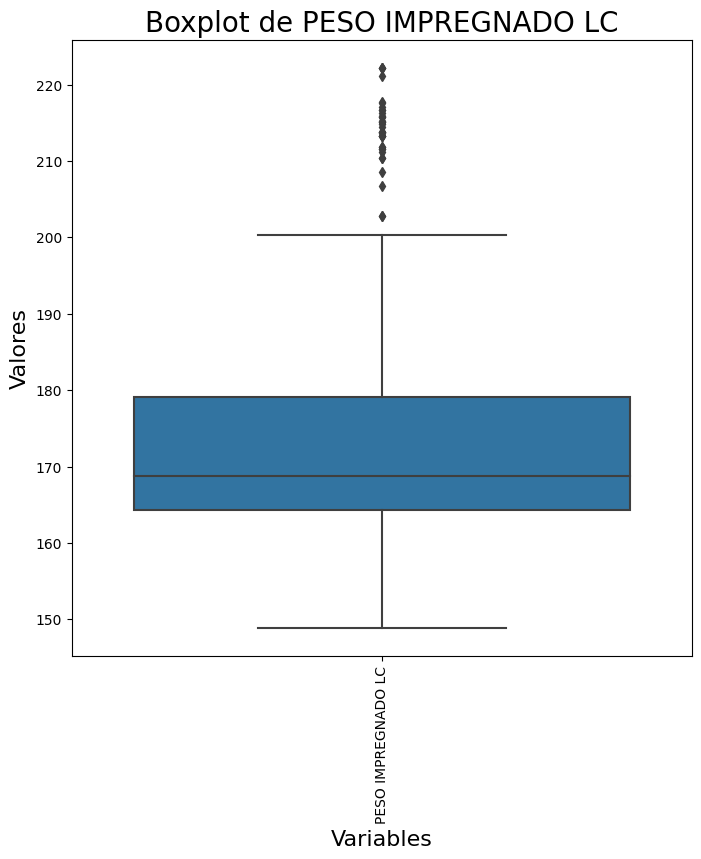

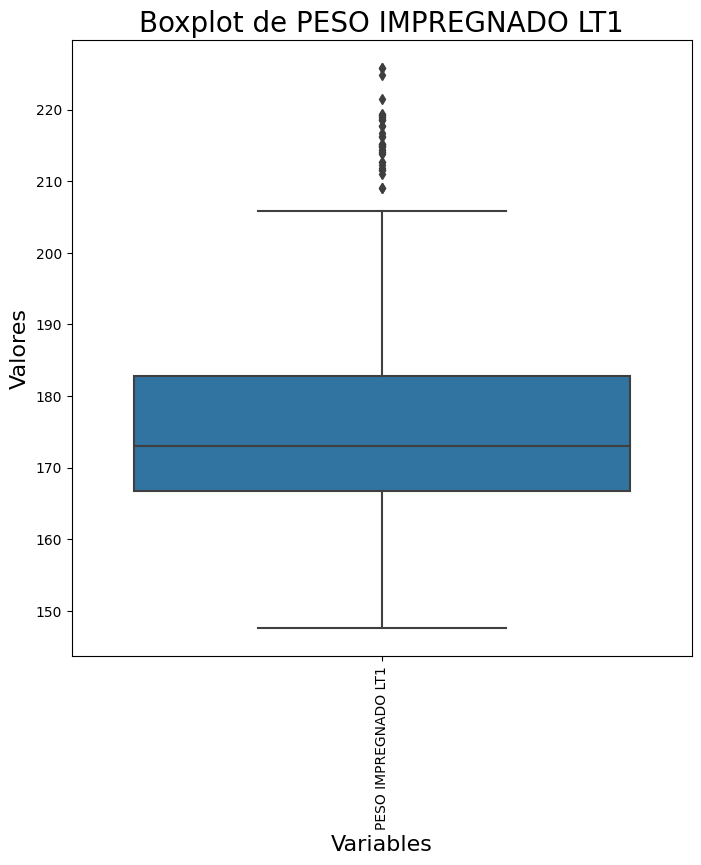

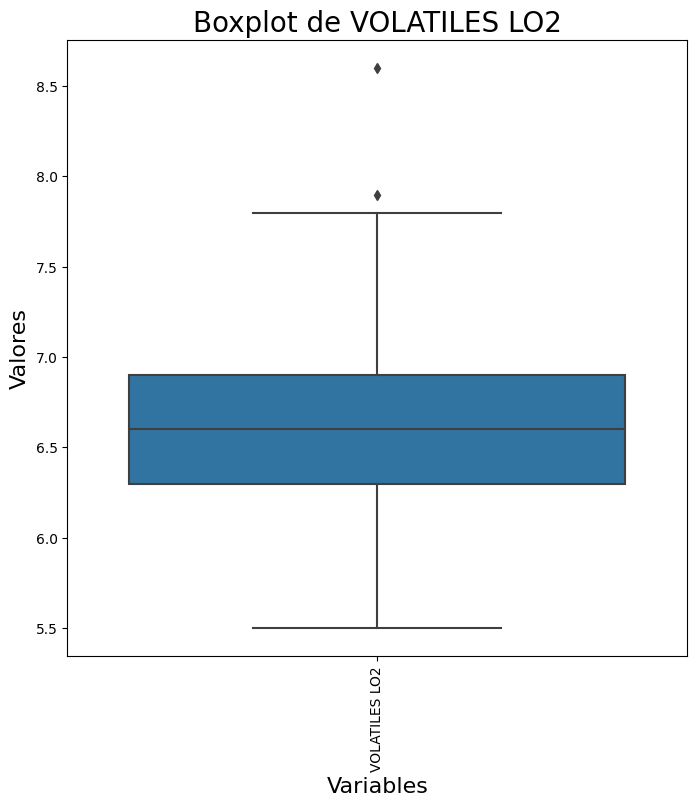

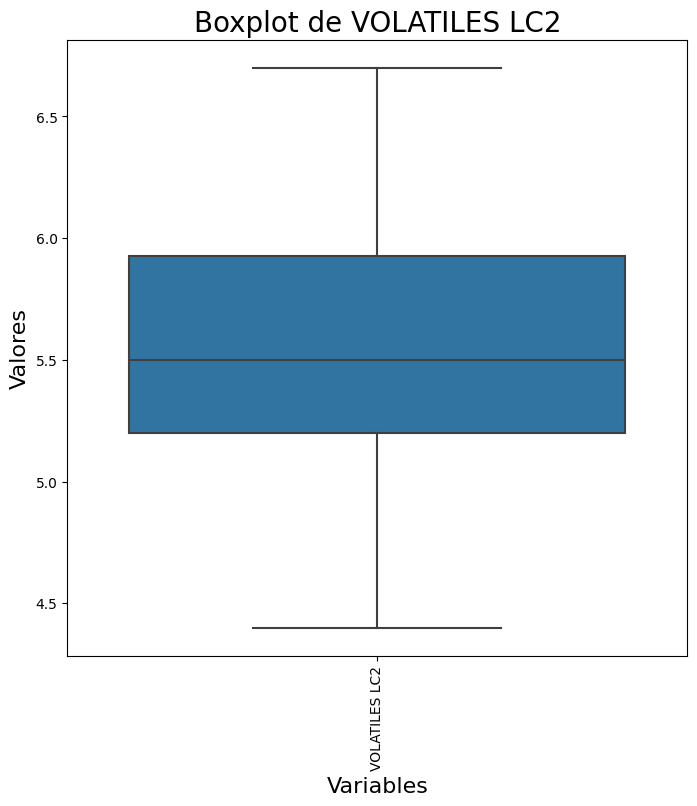

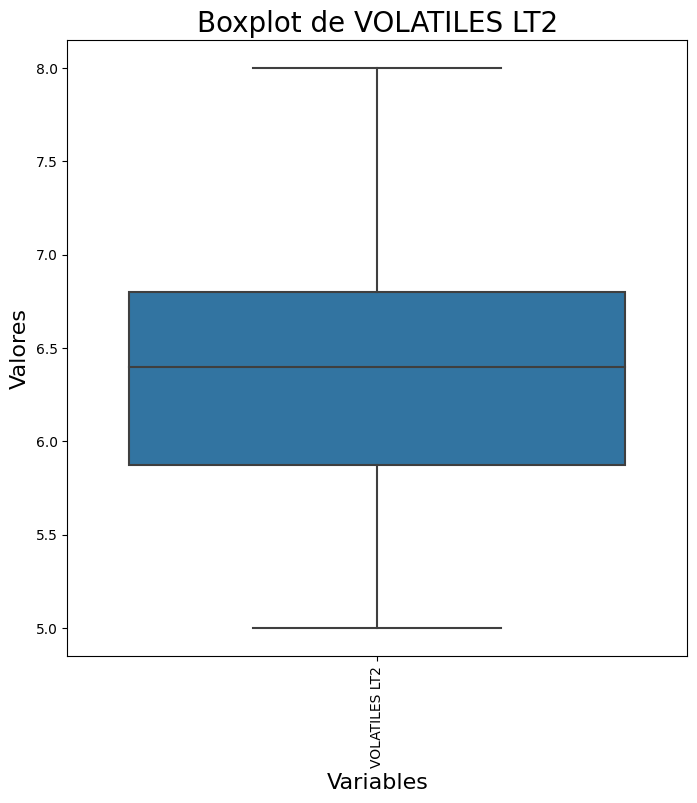

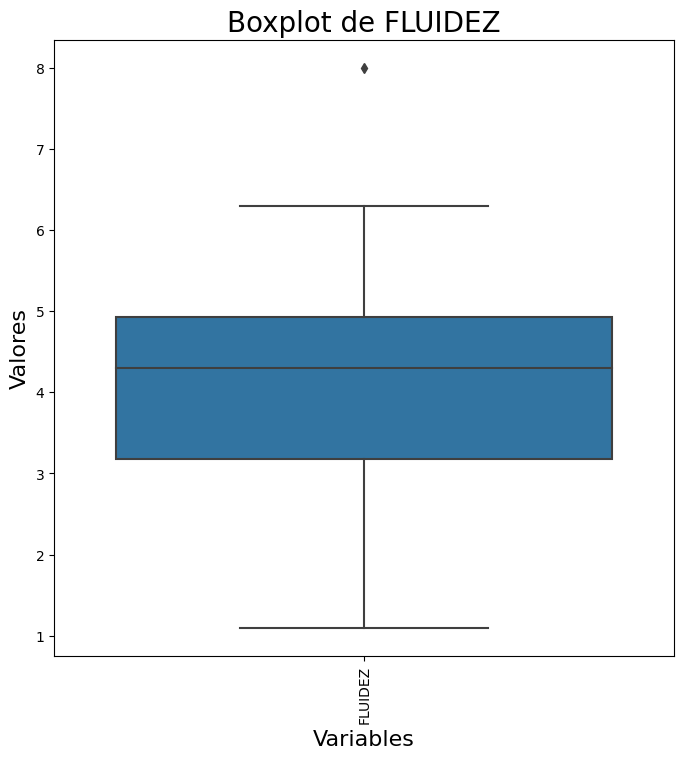

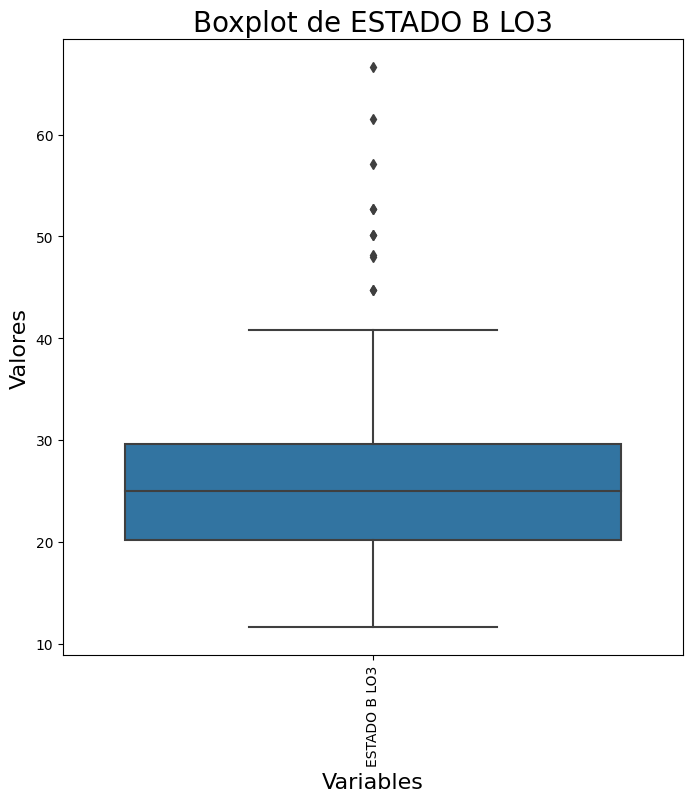

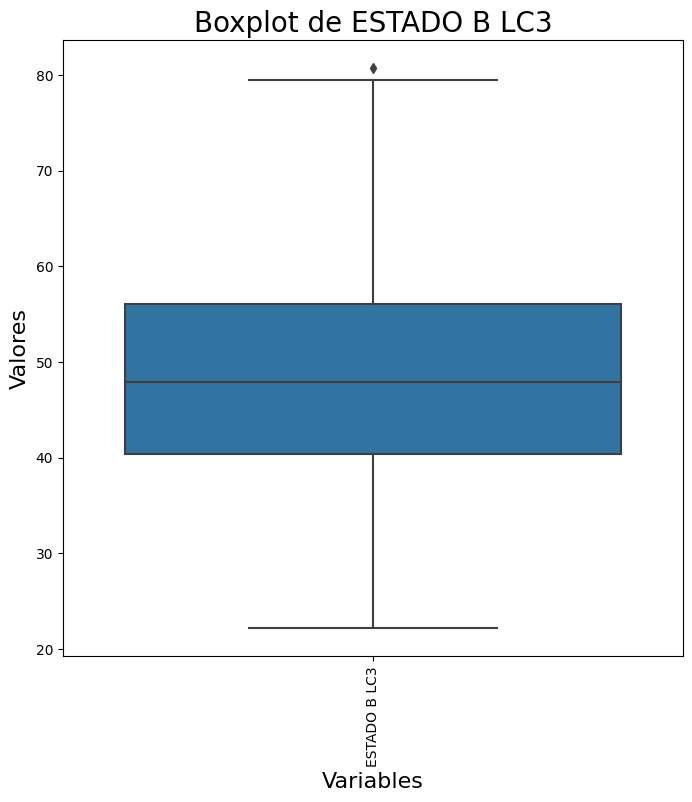

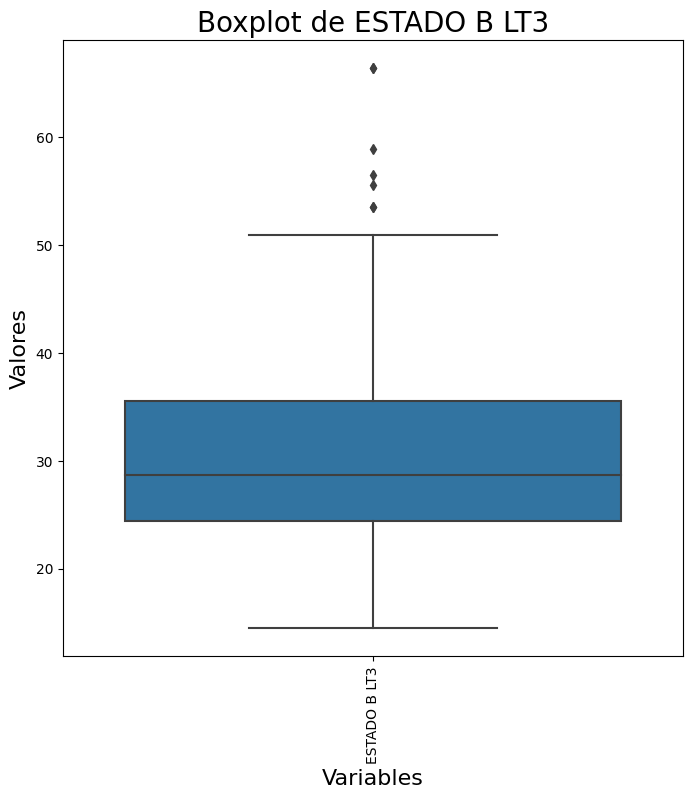

In [21]:
for column in numerical_features:
    plt.figure(figsize=(8, 8))  # Crear una nueva figura para cada plot
    sns.boxplot(data=df[[column]])  # Realizar un boxplot para la columna actual
    plt.title(f'Boxplot de {column}', fontsize=20)  # Personalizar el título con el nombre de la columna
    plt.xlabel('Variables', fontsize=16)
    plt.ylabel('Valores', fontsize=16)
    plt.xticks(rotation=90)  # Es posible que no necesite esta línea, ya que hay solo una variable
    plt.show()  # Mostrar el plot

De las graficas anteriores se observa en la grafica del GAP LT(mm) un datos atipico muy pero muy elevado. Estos datos atipicos deben ser eliminados. Se observa que este dato atipico corresponde a 160 y reemplazamos este valor por la moda.

In [22]:
df["GAP LT(mm)"]=df["GAP LT(mm)"].replace(160,df["GAP LT(mm)"].mode()[0],regex=True)

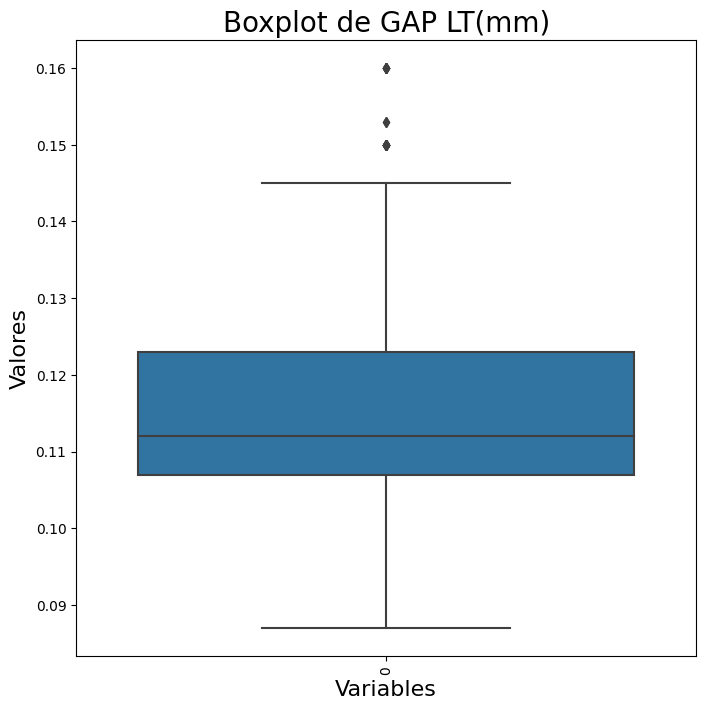

In [23]:
plt.figure(figsize=(8, 8))  # Crear una nueva figura para cada plot
sns.boxplot(data=df["GAP LT(mm)"])  # Realizar un boxplot para la columna actual
plt.title(f'Boxplot de GAP LT(mm)', fontsize=20)  # Personalizar el título con el nombre de la columna
plt.xlabel('Variables', fontsize=16)
plt.ylabel('Valores', fontsize=16)
plt.xticks(rotation=90)  # Es posible que no necesite esta línea, ya que hay solo una variable
plt.show()  # Mostrar el plot

Se puede observar que el diagrama de cajas de la variable GAP LT(mm) mejoró mucho y ya no tiene un valor atipico tan grande.

##SE CODIFICA LAS CARACTERISTICAS QUE CONTIENEN VALORES CATEGORICOS

In [26]:
df['DISENO']=df['DISENO'].astype('category').cat.codes
df['PLANTA']=df['PLANTA'].astype('category').cat.codes

df['DISENO']=df['DISENO'].astype('object')
df['PLANTA']=df['PLANTA'].astype('object')

##se crea archivo plano con la modificación de los atributos Diseno, planta y GAP LT(mm)

In [32]:
df.to_csv('proyecto_pre-procesado_2.csv', index=False)

## ANALISIS DE LOS COMPONENTES PRINCIPALES

In [35]:
pca = PCA(n_components=2)
components = pca.fit_transform(df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
total_var = pca.explained_variance_ratio_.sum() * 100

features=df.columns.values

fig = px.scatter(
    components, x=0, y=1,
        title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

en la figura anterior se puede observar que las caracteristicas Vel Vent Horno 4, 5 6 se mueven en la misma dirección.

Vel vent horno 1 y 2 se mueven en la misma dirección.

Temp horno 1 y 2 se mueven en la misma dirección.

Temp horno 4 y 5 se mueven en la misma dirección.

Gramaje y tem horno 6 se muerve en la misma dirección de peso impregnado LC1,LT1 y LO1.

Diseño y Estado B LO3, LT3 y LC3 se mueven en la misma dirección.

También se observa que Gramaje, peso impregnado LC1,LT1 y LO se mueven en dirección opuesta a velocidad de linea. Confirmando el analisis de las correlaciones realizado anteriormente.